# using drive
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
input_data=[]
fp = open('/content/drive/My Drive/project/i580w_jan 2012_input.txt','r')
for line in fp:
    line=line.strip('\n')   #将\n去掉
    input_data.append(line.split(' '))   #将空格作为分隔符将一个字符切割成一个字符数组

fp.close()

# fp = open('/content/drive/My Drive/project/i580w_feb 2012_input.txt','r')
# for line in fp:
#     line=line.strip('\n')   #将\n去掉
#     input_data.append(line.split(' '))   #将空格作为分隔符将一个字符切割成一个字符数组

# fp.close()


input_data=np.array(input_data,dtype=int)   #将其转换成numpy的数组，并定义数据类型为float
print(input_data.shape)

target_data=[]
fp = open('/content/drive/My Drive/project/i580w_jan 2012_target.txt','r')
for line in fp:
    line=line.strip('\n')   #将\n去掉
    target_data.append(line.split(' '))   #将空格作为分隔符将一个字符切割成一个字符数组

# fp = open('/content/drive/My Drive/project/i580w_feb 2012_target.txt','r')
# for line in fp:
#     line=line.strip('\n')   #将\n去掉
#     target_data.append(line.split(' '))   #将空格作为分隔符将一个字符切割成一个字符数组

# fp.close()

target_data=np.array(target_data,dtype=int)   #将其转换成numpy的数组，并定义数据类型为float
print(target_data.shape)

print(input_data[:8])
print(target_data[:8])

(8925, 24)
(8925, 8)
[[ 3 12  4  0  0  4  1  2  1  4  1  0  1  6  1  8  2  5  6  0  5  2  1  5]
 [ 1  4  1  0  1  6  1  8  2  5  6  0  5  2  1  5  2  6  6  0  4  4  0  9]
 [ 2  5  6  0  5  2  1  5  2  6  6  0  4  4  0  9  4  8 12  0  6  2  0 12]
 [ 2  6  6  0  4  4  0  9  4  8 12  0  6  2  0 12 11 11 10  0  2  4  2  9]
 [ 4  8 12  0  6  2  0 12 11 11 10  0  2  4  2  9 15  7 14  0  8  4  0  9]
 [11 11 10  0  2  4  2  9 15  7 14  0  8  4  0  9 13  7 13  0  4 12  2  9]
 [15  7 14  0  8  4  0  9 13  7 13  0  4 12  2  9  7 14 14  0  6  3  1 12]
 [13  7 13  0  4 12  2  9  7 14 14  0  6  3  1 12  9 11 24  0  6  1  3 11]]
[[ 2  6  6  0  4  4  0  9]
 [ 4  8 12  0  6  2  0 12]
 [11 11 10  0  2  4  2  9]
 [15  7 14  0  8  4  0  9]
 [13  7 13  0  4 12  2  9]
 [ 7 14 14  0  6  3  1 12]
 [ 9 11 24  0  6  1  3 11]
 [13 11 23  0  5  6  1 20]]


Text(0, 0.5, 'Number of vehicles')

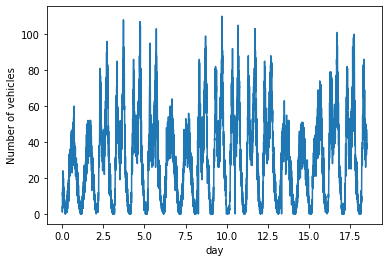

In [4]:
plt.plot(np.arange(5335)*5/60/24,input_data[:5335,2])
plt.xlabel("day")
plt.ylabel("Number of vehicles")

In [5]:
#drive.flush_and_unmount()
#print('All changes made in this colab session should now be visible in Drive.')

# input size
交通流的最大值

In [6]:
input_size = 0

In [7]:
input_max = np.max(input_data, axis = 0)
input_min = np.min(input_data, axis = 0)
output_max = np.max(target_data, axis = 0)
output_min = np.min(target_data, axis = 0)

print("input max:{0},\n input min:{1},\n output max:{2},\n output min:{3}".format(input_max,input_min,output_max,output_min)) 


input max:[ 91 131 111   0  36  82  33 147  91 131 111   0  36  82  33 147  91 131
 111   0  36  82  33 147],
 input min:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],
 output max:[ 91 131 111   0  36  82  33 147],
 output min:[0 0 0 0 0 0 0 0]


In [8]:
# def normalization(data):
#     _range = np.max(data) - np.min(data)
#     return (data - np.min(data)) / _range
 

# def standardization(data):
#     mu = np.mean(data, axis=0)
#     sigma = np.std(data, axis=0)
#     return (data - mu) / sigma

In [9]:
# input_data = normalization(input_data)
# target_data = normalization(target_data)

In [10]:
# print(input_data[:8])
# print(target_data[:8])

Split the data and begin training


In [11]:
from sklearn.model_selection import train_test_split
import torch.utils.data as Data

X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

Batch_Size = 32
train_dataset = Data.TensorDataset(torch.from_numpy(X_train),torch.from_numpy(y_train))

#load training data
train_loader = Data.DataLoader(dataset = train_dataset,
                 batch_size = Batch_Size,
                 shuffle = True)

val_dataset = Data.TensorDataset(torch.from_numpy(X_val),torch.from_numpy(y_val))
#load validation data
val_loader = Data.DataLoader(dataset = val_dataset,
                 batch_size = Batch_Size,
                 shuffle = False)

test_dataset = Data.TensorDataset(torch.from_numpy(X_test),torch.from_numpy(y_test))
#load testing data
test_loader = Data.DataLoader(dataset = test_dataset,
                 batch_size = Batch_Size,
                 shuffle = False)



In [12]:
for batch_idx, batch in enumerate(train_loader):
  print(batch[1])
  break

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0],
        [28, 64, 66,  0,  6, 39,  9, 46],
        [15, 26, 29,  0,  7, 13,  2, 28],
        [ 3,  6, 12,  0,  1,  6,  1, 15],
        [17, 41, 20,  0,  3, 13,  4, 51],
        [ 0,  1,  3,  0,  2,  2,  0,  0],
        [31, 62, 53,  0,  5, 33,  3, 52],
        [26, 33, 33,  0, 18, 38, 10, 38],
        [47, 34, 37,  0, 16, 58, 14, 43],
        [59, 80, 44,  0,  3, 32, 11, 85],
        [ 7, 15, 18,  0,  3, 11,  0, 20],
        [69, 62, 74,  0,  9, 37, 10, 85],
        [38, 55, 65,  0, 14, 29,  5, 60],
        [20, 29, 38,  0, 17, 23, 18, 38],
        [16, 18,  8,  0,  1,  7,  3, 21],
        [10, 14, 23,  0,  6, 11,  3, 12],
        [ 4, 13,  4,  0,  0,  9,  0, 12],
        [ 3,  0,  5,  0,  2,  8,  0,  2],
        [ 3,  2,  2,  0,  2,  3,  0,  3],
        [27, 17, 16,  0, 16, 42, 12, 26],
        [24, 57, 40,  0,  4, 31, 14, 56],
        [20, 13, 27,  0, 15, 26, 10, 17],
        [34, 63, 38,  0,  2, 19,  5, 38],
        [37, 77, 84,  0, 10, 34,  

In [13]:
max_size = np.max(input_max) + 1

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Code Reference
https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/Pytorch/more_advanced/Seq2Seq/seq2seq.py \\
https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html#loading-data-files \\
https://github.com/aladdinpersson/Machine-Learning-Collection/tree/master/ML/Pytorch/more_advanced/Seq2Seq_attention \\
下面两个是attention版本
代码是基础的encoder-decoder

In [15]:
import random

In [16]:
class Encoder(nn.Module):
    def __init__(self, input_size, embedding_size, hidden_size, num_layers, p):
        super(Encoder, self).__init__()
        self.dropout = nn.Dropout(p)
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.embedding = nn.Embedding(input_size, embedding_size)
        self.rnn = nn.LSTM(embedding_size, hidden_size, num_layers, dropout=p)
        # self.rnn = nn.GRU(embedding_size, hidden_size, num_layers, dropout=p)

    def forward(self, x):
        # x shape: (seq_length, N) where N is batch size

        embedding = self.dropout(self.embedding(x))
        # embedding shape: (seq_length, N, embedding_size)

        outputs, (hidden, cell) = self.rnn(embedding)
        # outputs shape: (seq_length, N, hidden_size)

        return hidden, cell

In [17]:
class Decoder(nn.Module):
    def __init__(
        self, input_size, embedding_size, hidden_size, output_size, num_layers, p
    ):
        super(Decoder, self).__init__()
        self.dropout = nn.Dropout(p)
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.embedding = nn.Embedding(input_size, embedding_size)
        self.rnn = nn.LSTM(embedding_size, hidden_size, num_layers, dropout=p)
        # self.rnn = nn.GRU(embedding_size, hidden_size, num_layers, dropout=p)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden, cell):
        # x shape: (N) where N is for batch size, we want it to be (1, N), seq_length
        # is 1 here because we are sending in a single word and not a sentence
        x = x.unsqueeze(0)
        
        
        embedding = self.dropout(self.embedding(x))
        # embedding shape: (1, N, embedding_size)

        outputs, (hidden, cell) = self.rnn(embedding, (hidden, cell))
        # outputs shape: (1, N, hidden_size)

        predictions = self.fc(outputs)

        # predictions shape: (1, N, length_target_vocabulary) to send it to
        # loss function we want it to be (N, length_target_vocabulary) so we're
        # just gonna remove the first dim
        predictions = predictions.squeeze(0)

        return predictions, hidden, cell


In [18]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, source, target, teacher_force_ratio=0.5):
        # 转换轴
        source = torch.transpose(source,0,1)
        target = torch.transpose(target,0,1)

        batch_size = source.shape[1]
        target_len = target.shape[0]
        target_flow_size = max_size # flow的最大值

        outputs = torch.zeros(target_len, batch_size, target_flow_size).to(device)

        hidden, cell = self.encoder(source)

        # Grab the first input to the Decoder which will be <SOS> token
        # x = target[0] 
        x = torch.zeros(8) #原本是输入sos
        x = target[0]

        # for t in range(1, target_len):
        for t in range(target_len):
            # Use previous hidden, cell as context from encoder at start
            output, hidden, cell = self.decoder(x, hidden, cell)

            # Store next output prediction
            outputs[t] = output

            # Get the best word the Decoder predicted (index in the vocabulary)
            best_guess = output.argmax(1)

            # With probability of teacher_force_ratio we take the actual next word
            # otherwise we take the word that the Decoder predicted it to be.
            # Teacher Forcing is used so that the model gets used to seeing
            # similar inputs at training and testing time, if teacher forcing is 1
            # then inputs at test time might be completely different than what the
            # network is used to. This was a long comment.
            x = target[t] if random.random() < teacher_force_ratio else best_guess

        return outputs

# Training

In [19]:
input_size_encoder = max_size
encoder_embedding_size = 128
hidden_size = 64
num_layers = 2
encoder_dropout = 0.5

encoder = Encoder(input_size_encoder, encoder_embedding_size,
                           hidden_size, num_layers, encoder_dropout).to(device)
print(encoder)


Encoder(
  (dropout): Dropout(p=0.5, inplace=False)
  (embedding): Embedding(148, 128)
  (rnn): LSTM(128, 64, num_layers=2, dropout=0.5)
)


In [20]:
input_size_decoder = max_size
decoder_embedding_size = 128
hidden_size = 64
num_layers = 2
decoder_dropout = 0.5
output_size = max_size

decoder = Decoder(input_size_decoder, decoder_embedding_size,
                           hidden_size, output_size, num_layers, decoder_dropout).to(device)
print(decoder)

Decoder(
  (dropout): Dropout(p=0.5, inplace=False)
  (embedding): Embedding(148, 128)
  (rnn): LSTM(128, 64, num_layers=2, dropout=0.5)
  (fc): Linear(in_features=64, out_features=148, bias=True)
)


In [21]:
learning_rate = 0.001

model = Seq2Seq(encoder, decoder).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

criterion = nn.CrossEntropyLoss()

In [22]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter(f"runs/loss_plot")
step = 0

In [23]:
def checkpoint_and_save(model, best_loss, epoch, optimizer, epoch_loss):
    print('saving')
    drive.mount('/content/drive')
    state = {'model': model,'best_loss': best_loss,'epoch': epoch,'rng_state': torch.get_rng_state(), 'optimizer': optimizer.state_dict(),}
    torch.save(state, '/content/drive/My Drive/project/checkpoint-trafficflow')
    torch.save(model.state_dict(),'/content/drive/My Drive/project/checkpoint-trafficflow')

In [24]:
train_loss = []
val_loss = []

In [25]:
num_epochs = 50
best_loss = 999999
best_epoch = -1
# sentence1 = "ein mann in einem blauen hemd steht auf einer leiter und putzt ein fenster"
# ts1  = []
for epoch in range(num_epochs):
  print("Epoch - {} / {}".format(epoch+1, num_epochs))
  # model.eval()
  # translated_sentence1 = translate_sentence(model, sentence1, german, english, device, max_length=50)
  # print(f"Translated example sentence 1: \n {translated_sentence1}")
  # ts1.append(translated_sentence1)

  model.train(True)
  batch_train_loss = 0
  epoch_loss = 0
  for batch_idx, batch in enumerate(train_loader):
      
    input = batch[0].to(device)
    target = batch[1].to(device)

    # Pass the input and target for model's forward method
    #print(batch_idx)
    # print(input.size())
    # print(target.size())
    # print(target)
    output = model(input, target)
    # output = output[1:].reshape(-1, output.shape[2])
    # target = target[1:].reshape(-1)
    target = torch.transpose(target,0,1)
    output = output.reshape(-1, output.shape[2])
    target = target.reshape(-1)
    # print(output.size())
    # print(target.size())

    # Clear the accumulating gradients
    optimizer.zero_grad()

    # Calculate the loss value for every epoch
    loss = criterion(output, target)

    # Calculate the gradients for weights & biases using back-propagation
    loss.backward()

    # Clip the gradient value is it exceeds > 1
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)

    # Update the weights values using the gradients we calculated using bp 
    optimizer.step()
    step += 1
    epoch_loss += loss.item()
    writer.add_scalar("Training loss", loss, global_step=step)
    batch_train_loss += loss.item()
  train_loss.append(batch_train_loss/len(train_loader))
  # if epoch_loss < best_loss:
  #   best_loss = epoch_loss
  #   best_epoch = epoch
  #   checkpoint_and_save(model, best_loss, epoch, optimizer, epoch_loss) 
  #   if ((epoch - best_epoch) >= 10):
  #     print("no improvement in 10 epochs, break")
  #     break
  #print("Epoch_Loss - {}".format(loss.item()))
  #train_loss.append(loss.item())
  print("Epoch_Loss - {}".format(epoch_loss/len(train_loader)))
  print()
  if epoch % 3 == 0:
    validation_loss = 0
    model.eval()
    for batch_idx, batch in enumerate(val_loader):
        
      input = batch[0].to(device)
      target = batch[1].to(device)

      output = model(input, target)

      target = torch.transpose(target,0,1)
      output = output.reshape(-1, output.shape[2])
      target = target.reshape(-1)

      optimizer.zero_grad()

      loss = criterion(output, target)

      validation_loss += loss.item()
    
    print("Validation_Loss - {}".format(validation_loss/len(val_loader)))
    print()

    if validation_loss < best_loss:
      best_loss = validation_loss
      torch.save(model.state_dict(), 'params.pth')
      checkpoint_and_save(model, best_loss, epoch, optimizer, epoch_loss)

    val_loss.append(validation_loss/len(val_loader))



Epoch - 1 / 50
Epoch_Loss - 3.418323213161703

Validation_Loss - 2.9316234482659236

saving
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch - 2 / 50
Epoch_Loss - 2.7592779338026845

Epoch - 3 / 50
Epoch_Loss - 2.5619684404501037

Epoch - 4 / 50
Epoch_Loss - 2.4491317598513387

Validation_Loss - 2.3759617620044287

saving
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch - 5 / 50
Epoch_Loss - 2.3323616275574244

Epoch - 6 / 50
Epoch_Loss - 2.2607467354342923

Epoch - 7 / 50
Epoch_Loss - 2.205440025755813

Validation_Loss - 2.1848070912890964

saving
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch - 8 / 50
Epoch_Loss - 2.1541820990972678

Epoch - 9 / 50
Epoch_Loss - 2.1156825626362634

Epoch - 10 / 50
Epoch_Loss - 2.079140561252999



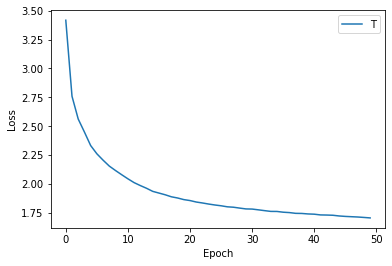

In [26]:
import matplotlib.pyplot as plt
#print(train_loss)
plt.figure(1)
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend('Training loss')

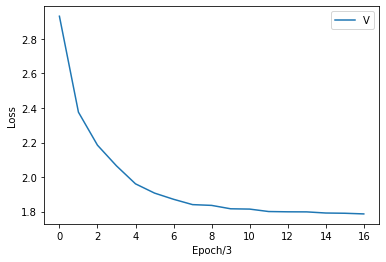

In [27]:
plt.figure(2)
plt.plot(val_loss)
plt.xlabel('Epoch/3')
plt.ylabel('Loss')
plt.legend('Validation loss')

In [28]:
import math
import sklearn.metrics as metrics
test_loss = 0
# mae = 0
# rmse = 0
mape = 0
smape = 0
y_pred = []
y_true = []
model.load_state_dict(torch.load('params.pth'))  
model.eval()
for batch_idx, batch in enumerate(test_loader):
        
   input = batch[0].to(device)
   target = batch[1].to(device)

   output = model(input, target)

   target = torch.transpose(target,0,1)
   output = output.reshape(-1, output.shape[2])
   target = target.reshape(-1)

   optimizer.zero_grad()

   loss = criterion(output, target)

   pred = torch.argmax(output, dim=1)

  #  epoch_mae = torch.abs(pred - target).sum().data
  #  epoch_rmse = ((pred - target)*(pred - target)).sum().data

   # 分母可能是0，加一个小数

   epoch_mape = torch.abs(100 * (target - pred) / (target + 1)).sum().data
   epoch_smape = torch.abs(200 * (target - pred) / (target + pred + 0.001)).sum().data

  #  mae += epoch_mae
  #  rmse += epoch_rmse
   mape += epoch_mape
   smape += epoch_smape
   
   y_pred += pred.tolist()
   y_true += target.tolist()

   test_loss += loss.item()


# mae = mae / len(test_dataset)
# rmse = math.sqrt(rmse/len(test_dataset))
mape = mape / (len(test_dataset) * 8)
smape = smape / (len(test_dataset) * 8)
# print(mae)
# print(rmse)
print("MAPE ", mape.item()) # 分母为0，不可用
print("SMAPE ", smape.item())


# the size of y_pred: 8 * len(test_dataset)
# so multiply by 8
mae = metrics.mean_absolute_error(y_true, y_pred) * 8
mse = metrics.mean_squared_error(y_true, y_pred) * 8
rmse = mse ** (1/2)

print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)


MAPE  19.793983459472656
SMAPE  22.575624465942383
MAE:  20.346778711484593
MSE:  190.8935574229692
RMSE:  13.816423467126693


In [29]:
print('Average test error:',test_loss/len(test_loader))

Average test error: 1.7658728041819163


In [30]:
num = 0
for i in range(len(y_pred)):
  if y_pred[i] == y_true[i]:
    num += 1
precision = num / len(y_pred)
print("Precision: ", precision)

Precision:  0.4564425770308123


In [31]:
print(y_pred)

[24, 11, 2, 24, 31, 20, 26, 0, 15, 46, 30, 6, 23, 0, 45, 10, 16, 71, 0, 18, 15, 22, 19, 21, 48, 19, 26, 14, 13, 16, 46, 46, 33, 12, 7, 48, 78, 65, 50, 0, 18, 93, 57, 11, 23, 0, 87, 22, 16, 71, 0, 16, 22, 57, 14, 57, 26, 55, 60, 49, 22, 33, 85, 48, 27, 12, 5, 43, 68, 53, 48, 0, 15, 61, 42, 9, 31, 0, 87, 20, 16, 69, 0, 12, 19, 33, 14, 37, 32, 68, 48, 34, 17, 26, 79, 37, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 1, 0, 24, 5, 11, 0, 5, 5, 2, 3, 11, 0, 8, 8, 6, 5, 0, 12, 2, 5, 5, 3, 17, 19, 3, 3, 3, 8, 23, 17, 20, 10, 6, 22, 29, 31, 20, 0, 8, 37, 22, 5, 13, 0, 34, 13, 11, 38, 0, 58, 11, 30, 11, 30, 54, 24, 34, 32, 8, 13, 35, 41, 3, 1, 1, 2, 6, 5, 5, 0, 1, 9, 5, 1, 3, 0, 6, 3, 2, 7, 0, 18, 2, 5, 2, 3, 18, 9, 3, 5, 1, 3, 5, 11, 36, 13, 8, 49, 70, 60, 40, 0, 15, 98, 57, 12, 29, 0, 84, 21, 15, 93, 0, 13, 22, 54, 15, 47, 33, 62, 54, 47, 20, 29, 84, 43, 2, 20, 0, 17, 1, 28, 8, 0, 46, 24, 39, 8, 0, 2, 0, 36, 0, 22, 0, 2, 71, 0, 0, 13, 19,